# Проект по анализу данных

## Общая информация

Дата выдачи: 22.03.2016

Срок сдачи: 10.04.2016 09:00MSK

### О задании
В рамках курса "Интеллектуальный анализ данных" помимо выполнения контрольных и практических заданий вам также нужно выполнить проект. За каждый модуль ставится отдельная оценка. В этом модуле вам предстоит познакомиться с данными, сделать их описание, поискать закономерности. В следующем модуле вы продолжите работу с этими данными, но уже будете строить непосредственные модели, работающие с ними. 

Там, где требуется написать код, будет указано:
    
    ######################
    ### YOUR CODE HERE ###
    ######################

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Помимо кода вам также требуется написать развернутые ответы на вопросы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины не является уважительной причиной для продления дедлайна.

Обратите внимание, что на устном зачете в конце семестра некотоые вопросы могут быть связаны с проектом.

### Доп. баллы
В данном проекте вам будет предложено рассмотреть некоторые интересные закономерности в данных. Если вы обнаружите что-то интересное (например, в последнем пункте), либо у вас есть идеи как можно работать с данным датасетом — присылайте, это будет поощряться дополнительными баллами. Кроме того, вы можете выступить со своим личным исследованием на семинаре, это также не останется незамеченным.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_(group)_Project.ipynb, где Username — ваша фамилия на латинице, group — название группы (например, Petrov_IAD-19_Project.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма [ИАД-19] - Проект - Фамилия Имя Отчество.

## Определение итоговой оценки студента

В качестве данных мы будем рассматривать два датасета, а именно предсказание оценки по португальскому языку или математике. С какими именно данными нужно будет работать вам можно узнать, посмотрев [распределение по вариантам](https://docs.google.com/spreadsheets/d/1UUlgsu5TD-_YUNVtGkhrFr1zaQSHiQ8JfZ7VfbzYKAg/edit?usp=sharing).

По набору и типу признаков эти даннык никак не отличаются, поэтому на все вопросы ниже вам нужно ответить в рамках вашего датасета.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt

%matplotlib inline

Для начала загрузите данные. Обратите внимание, чтобы данные были загружены верно (был указан верный разделитель, а так же корректно отображались названия столбцов). Чтобы это проверить, а также посмотреть что представляют из себя данные, можно вывести первые несколько строк загруженного датасета на экран.

In [2]:
######################
### YOUR CODE HERE ###
######################

df = pd.read_csv('student-por.csv', ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**(0.5 балла)** Что в данной задаче является объектом?

**_Объектом являются студенты, изучающие португальский язык._**

Как можно видеть, признаков много и они все разной природы. Вот более подробная расшифровка признаков:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", "course" предпочтение некоторым предметам или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - колисечтво ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хорошо отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)

Признаки ниже связаны с курсом (математика/португальский)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - [целевая переменная] G3 - итоговая оценка (от 0 до 20)

**(0.5 балла)** Какое количество признаков есть в данной задаче (целевая переменная не является признаком)?

In [3]:
######################
### YOUR CODE HERE ###
######################
df_features = df[df.columns[:-1]]
print(df_features.shape[1])

32


**(1 балл)** Определите к какому из указанных ниже типов относится каждый признак:
 - бинарный
 - числовой
 - категориальный
 - порядковый
 - множественный

Если признаков некоторого типа нет, укажите это.

In [4]:
######################
### YOUR CODE HERE ###
######################
numerical_features = []
for v in df_features.columns.values:
    unique_values = df_features[v].unique()
    if type(unique_values[0]) is np.int64:
        if len(unique_values) <= 5 and v != 'failures':
            print(v, ': порядковый')
        else:
            # Далее массив numerical_features понадобится в одном задании
            numerical_features.append(v)
            print(v, ': числовой')
    else:
        if set(unique_values) == set(np.array(['yes', 'no'])):
            print(v, ': бинарный')
        else:
            print(v, ': категориальный')


school : категориальный
sex : категориальный
age : числовой
address : категориальный
famsize : категориальный
Pstatus : категориальный
Medu : порядковый
Fedu : порядковый
Mjob : категориальный
Fjob : категориальный
reason : категориальный
guardian : категориальный
traveltime : порядковый
studytime : порядковый
failures : числовой
schoolsup : бинарный
famsup : бинарный
paid : бинарный
activities : бинарный
nursery : бинарный
higher : бинарный
internet : бинарный
romantic : бинарный
famrel : порядковый
freetime : порядковый
goout : порядковый
Dalc : порядковый
Walc : порядковый
health : порядковый
absences : числовой
G1 : числовой
G2 : числовой


**_Признаков множественного типа нет._**

**(0.5 балла)** Есть ли в данных пропуски? Если да, назовите какие признаки имеют пропуски и удалите все объекты с пропусками. 

In [5]:
df_features.isnull().any().any()

False

**_Итак, пропусков нет._**

**(1 балл)** Теперь посмотрите на целевую переменную. К какому типу задач относится данная? Поясните свой ответ.

**_Данная задача является задачей регрессии, так как целевая переменная принимает вещественные значения (а именно, от 0 до 20 включительно)._**

**(1 балл)** Постройте гистограмму значений целевой переменной с количеством бинов (bins) равным 20. Какое самое частое значение? Есть ли студенты, получисшие 0? 20? Постройте аналогичный гистограммы для признаков G1 и G2. Есть ли различие между ними и целевой переменной и в чем оно состоит?

11
True
False


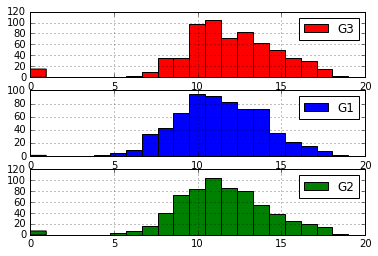

In [6]:
######################
### YOUR CODE HERE ###
######################
plt.subplot(311)
df.G3.hist(bins=20, color='red', label='G3')
plt.legend()
plt.subplot(312)
df.G1.hist(bins=20, color='blue', label='G1')
plt.legend()
plt.subplot(313)
df.G2.hist(bins=20, color='green', label='G2')
plt.legend();

print(df.G3.value_counts().idxmax())
print(0 in df.G3.values)
print(20 in df.G3.values)

**_Таким образом, самым частым значением G3 является 11; есть студенты, получившие 0, но нет студентов, получивших 20._**

**_Различие между G1 и G3 заключается в самом частом значении (у G1 это 10). Также и G1, и G2 отличаются от G3 количествами некоторых значений и появлениями новых значений (у G1 встречается значение 4 и 5, у G2 - 5, а у G3 они не встречаются)._**

**(1 балл)** Посчитайте корреляцию Пирсона между целевой переменной и значениями G1 и G2. Можно ли сказать, что между ними есть линейная зависимость? Для вычисления корреляции Пирсона можно воспользоваться функцией [pearsonr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) из модуля scipy.stats или методом [corr](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) датафрейма.

In [7]:
######################
### YOUR CODE HERE ###
######################
df[['G1', 'G2', 'G3']].corr()

,G1,G2,G3
G1,1.000000,0.864982,0.826387
G2,0.864982,1.000000,0.918548
G3,0.826387,0.918548,1.000000


**_Говорить, что где-либо есть линейная зависимость, нельзя, потому что модуль коэффициента Пирсона во всех трех случаях (G1 и G2, G1 и G3, G2 и G3) отличен от 1. Однако видно, что связь между G1 и G2 близка к линейной, как и в случае с G1 и G3, а связь между G2 и G3 очень близка к линейной._**

**(0.5 балла)** Найдите самую частую причину выбора школы.

In [8]:
######################
### YOUR CODE HERE ###
######################
df.reason.value_counts().idxmax()

'course'

**(1 балл)** В данных есть несколько интересных признаков. Например, школа. Постройте на одной гистограмме распределение целевой переменной в зависимости от школы. Верно или нет, что у студенты одной школы имеют оценки выше, чем другой? Кроме того, интересно также узнать, сказывается ли причина выборка школы на оценках. Постройте аналогичную гистограмму для тех, у кого в поле причины указана самая частая причина (она должна быть найдена в предыдущем пункте) и всех остальных. Верно ли, что студентны, выбравшие данную школу по этой причине более успешны?

(Примеры как можно строить такие гистограммы можно посмотреть в материалах к семинарам или [здесь](http://matplotlib.org/examples/statistics/histogram_demo_multihist.html) и [здесь](http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib)). 

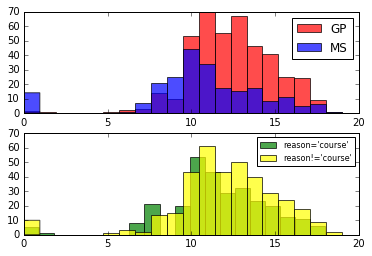

In [9]:
######################
### YOUR CODE HERE ###
######################
plt.subplot(211)
plt.hist(df[df.school == 'GP'].G3, bins=20, alpha=0.7, color='red', label='GP')
plt.hist(df[df.school == 'MS'].G3, bins=20, alpha=0.7, color='blue', label='MS')
plt.legend()
plt.subplot(212)
plt.hist(df[df.reason == 'course'].G3, bins=20, alpha=0.7, color='green', label="reason='course'")
plt.hist(df[df.reason != 'course'].G3, bins=20, alpha=0.7, color='yellow', label="reason!='course'")
plt.legend(prop={'size': 8});

**_Видно, что студенты из школы GP учатся лучше, чем студенты из школы MS: среднее по оценкам первых находится в районе 12-13, а среднее по оценкам вторых - в районе 10-11._**

**_Неверно, что студенты, выбравшие школу по причине 'course', более успешны, чем остальные, так как из гистограммы видно, что среднее по оценкам первых чуть меньше, чем у вторых._**

**(0.5 балла)** Сделайте описание числовых признаков: какое среднее, медиана, дисперсия, минимальное и максимальное значение. Для всех ли признаков эти величины имеют смысл? Если нашлись такие признаки, то поясните почему.

In [10]:
######################
### YOUR CODE HERE ###
######################
index = ['mean', 'median', 'variance', 'minimum', 'maximum']
d = dict()
for i in numerical_features:
    d[i] = [df[i].mean(), df[i].median(), df[i].var(), df[i].min(), df[i].max()]
df_numerical_features = pd.DataFrame(d, index=index)
df_numerical_features

,G1,G2,absences,age,failures
mean,11.399076,11.570108,3.659476,16.744222,0.221880
median,11.000000,11.000000,2.000000,17.000000,0.000000
variance,7.536481,8.489290,21.536642,1.483859,0.351928
minimum,0.000000,0.000000,0.000000,15.000000,0.000000
maximum,19.000000,19.000000,32.000000,22.000000,3.000000


**_Понятно, что эти величины имеют смысл только для числовых и порядковых (занумерованных) признаков, потому что только эти признаки из рассматриваемых задействуют вещественные числа._**

**_В случае числовых признаков, думаю, одной из самых информативных величин является среднее. Максимальное/минимальное значения особо ничего не дадут, как видно из признака, отвечающего за количество ранее не сданных предметов (среднее намного ближе к минимуму, чем к максимуму). Медиана в данном случае немногим отличается от среднего. Дисперсия также может нести в себе определенную полезную информацию._**

**(0.75 балла)** Верно ли, что студенты имеющие больше 10 пропусков учатся хуже, чем все остальные? На этот вопрос вы можете ответить, посмотрев на данные любым удобным для вас способом (например, аналогично предыдущим пунктам, либо сравнив средние оценки и т.д.). 

In [11]:
######################
### YOUR CODE HERE ###
######################
mean_many_absences = df[df.absences > 10].G3.mean()
mean_few_absences = df[df.absences <= 10].G3.mean()
print(mean_many_absences, mean_few_absences)
print(mean_many_absences < mean_few_absences)

10.653061224489797 12.008333333333333
True


**_Таким образом, студенты, имеющие больше 10 пропусков, действительно учатся хуже, чем все остальные._**

**(0.75 балла)** Верно ли, что студенты желающие получить высшее образование учатся лучше, чем все остальные? 

In [12]:
######################
### YOUR CODE HERE ###
######################
mean_higher_yes = df[df.higher == 'yes'].G3.mean()
mean_higher_no = df[df.higher == 'no'].G3.mean()
print(mean_higher_yes, mean_higher_no)
print(mean_higher_yes > mean_higher_no)

12.275862068965518 8.797101449275363
True


**_Таким образом, студенты, желающие получить высшее образование, действительно учатся лучше, чем все остальные._**

**(1 балл)** Выберете признаки из не рассмотренных ранее. Какие на ваш взгляд влияют на итоговую оценку? Попробуйте найти закономерности, аналогичные рассмотренным ("студенты желающие получить высшее образование учатся лучше, чем все остальные").

In [13]:
######################
### YOUR CODE HERE ###
######################
mean_highMD_yes = df[(df.Medu == 4) & (df.Fedu == 4)].G3.mean()
mean_highMD_no = df[(df.Medu != 4) | (df.Fedu != 4)].G3.mean()
print(mean_highMD_yes, mean_highMD_no)
print(mean_highMD_yes > mean_highMD_no)

mean_study_lot = df[df.studytime > 2].G3.mean()
mean_study_few = df[df.studytime <= 2].G3.mean()
print(mean_study_lot, mean_study_few)
print(mean_study_lot > mean_study_few)

mean_internet_yes = df[df.internet == 'yes'].G3.mean()
mean_internet_no = df[df.internet == 'no'].G3.mean()
print(mean_internet_yes, mean_internet_no)
print(mean_internet_yes > mean_internet_no)

mean_absences_lot = df[df.absences > 2].G3.mean()
mean_absences_few = df[df.absences <= 2].G3.mean()
print(mean_absences_lot, mean_absences_few)
print(mean_absences_lot < mean_absences_few)

mean_schoolsup_yes = df[df.schoolsup == 'yes'].G3.mean()
mean_schoolsup_no = df[df.schoolsup == 'no'].G3.mean()
print(mean_schoolsup_yes, mean_schoolsup_no)
print(mean_schoolsup_yes > mean_schoolsup_no)

mean_paid_yes = df[df.paid == 'yes'].G3.mean()
mean_paid_no = df[df.paid == 'no'].G3.mean()
print(mean_paid_yes, mean_paid_no)
print(mean_paid_yes > mean_paid_no)

mean_Dalc_often = df[df.Dalc > df.Dalc.median()].G3.mean()
mean_Dalc_rarely = df[df.Dalc <= df.Dalc.median()].G3.mean()
print(mean_Dalc_often, mean_Dalc_rarely)
print(mean_Dalc_often < mean_Dalc_rarely)

mean_romantic_yes = df[df.romantic == 'yes'].G3.mean()
mean_romantic_no = df[df.romantic == 'no'].G3.mean()
print(mean_romantic_yes, mean_romantic_no)
print(mean_romantic_yes < mean_romantic_no)

13.115789473684211 11.6985559566787
True
13.181818181818182 11.58027079303675
True
12.17269076305221 11.026490066225165
True
11.657243816254416 12.098360655737705
True
11.279411764705882 11.97934595524957
False
11.205128205128204 11.950819672131148
False
11.01010101010101 12.299334811529933
True
11.523012552301255 12.129268292682926
True


**_На итоговую оценку напрямую могут влиять наличие у родителей высшего образования, количество учебных часов в неделю, наличие домашнего интернета (может оказаться полезным для поиска необходимой информации), количество пропусков. Оказывается, что все действительно так; единственное замечание - количество пропусков влияет на оценку совсем незначительно._**

**_Интересно, что наличие дополнительных занятий (как платных, так и нет) оказывает негативное влияние на итоговую оценку (хотя она получается примерно одинаковой у тех, кто берет занятия и кто не берет). Стоит отметить, что употребление алкоголя в будние дни сравнительно сильно влияет на итоговую оценку: кто пьет в будни больше, тот в среднем хуже учится._**

**_Забавно также то, что студенты, не состоящие в романтических отношениях, в среднем учатся лучше, чем остальные. Возможно это связано с тем, что у них благодаря отсутствию таких отношений появляется больше времени на занятия._**